In [69]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score

In [50]:
titanic = pd.read_csv(r'./data/titanic/fulldata.csv')

In [51]:
y = titanic['Survived']
X = titanic.drop(['Name', 'Survived'], axis = 1)

In [52]:
X['Age'].fillna(X['Age'].mean(), inplace = True)
X.fillna('UNKNOWN', inplace = True)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 33)

In [54]:
vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
X_test = vec.transform(X_test.to_dict(orient = 'record'))

/var/folders/ch/8przwvlx5kv4tbskgm9xk_fr0000gn/T/ipykernel_29553/1677337345.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = vec.fit_transform(X_train.to_dict(orient = 'record'))
/var/folders/ch/8przwvlx5kv4tbskgm9xk_fr0000gn/T/ipykernel_29553/1677337345.py:3: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_test = vec.transform(X_test.to_dict(orient = 'record'))


In [55]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))

0.8628048780487805


In [56]:
# 筛选出前20%的特征
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = 20)
X_train_fs = fs.fit_transform(X_train, y_train)
dt.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
print(dt.score(X_test_fs, y_test))

0.8201219512195121


In [77]:
percentiles = range(1, 100, 2)
results = []
for i in percentiles:
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile = i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_val_score(dt, X_train_fs, y_train, cv = 5)
    results = np.append(results, scores.mean())
print(results)

[0.83180358 0.83487517 0.83283435 0.83793639 0.82874754 0.82568632
 0.83078836 0.83180358 0.84199731 0.84099244 0.84301771 0.83588522
 0.83995131 0.84505335 0.84606858 0.83484927 0.84097172 0.85422667
 0.85524189 0.85420595 0.85931835 0.85931835 0.86645084 0.86441521
 0.85625194 0.86848648 0.85728271 0.87053766 0.8684813  0.86338962
 0.86543044 0.86645084 0.87560862 0.87662903 0.87358334 0.87256811
 0.87255257 0.87358334 0.87357816 0.87459857 0.8684554  0.87153735
 0.87154253 0.86643531 0.87053248 0.86642495 0.86746089 0.86135916
 0.86747125 0.8654149 ]


In [78]:
opt = int(np.where(results == results.max())[0])
print('Optimal number of features %d' %percentiles[opt])

Optimal number of features 67


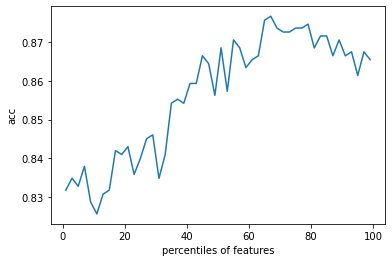

In [79]:
pl.plot(percentiles, results)
pl.xlabel('percentiles of features')
pl.ylabel('acc')
pl.show()